In [1]:
"""
# Se precisar baixar os dados:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("miguelmallqui17/peru-student-enrollment-data-2023")

print("Path to dataset files:", path)
"""

'\n# Se precisar baixar os dados:\n\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("miguelmallqui17/peru-student-enrollment-data-2023")\n\nprint("Path to dataset files:", path)\n'

<center>UFPB - CCSA - Bacharelado em Ciência de Dados para Negócios

Projeto Aplicado: Aprendizagem Supervisionada

Prof. Aléssio Tony

### Predição de inadimplência estudantil em instituições de ensino superior privadas: Uma aplicação de aprendizagem de máquina supervisionada como ferramenta de gestão comercial, marketing e financeira

### Alunos:
Beatriz Gonçalves Bento

Renato Silva de Assis</center>




<center>Fonte dos dados: https://www.kaggle.com/datasets/miguelmallqui17/peru-student-enrollment-data-2023?select=peru_student_enrollment_data_2023.csv </center>

### Sobre o Conjunto de Dados (traduzido para do inglês, da página no Kaggle)
Este conjunto de dados contém informações de matrículas de estudantes de uma universidade peruana para o ano de 2023. Ele apresenta desafios como valores ausentes e formatação inconsistente, particularmente na representação de gênero (1, 2, M, F, U), o que requer limpeza e transformação dos dados. O conjunto de dados permite uma análise aprofundada das tendências de matrícula, entre outros indicadores.

Descrição:

MATRÍCULA – Tipo de matrícula do estudante:
- Novo: Estudante se matriculando pela primeira vez.
- Rematriculado: Estudante dando continuidade aos estudos sem interrupção.
- Reincorporado: Estudante retornando após um período de inatividade.

CLASSIFICAÇÃO: 
- Cursos de Graduação (Carreras Pregrado)
- Cursos de Graduação Semipresenciais (50-50)
- Cursos de Graduação Semipresenciais (80-20)
- Cursos de Graduação para Pessoas que Trabalham (Carreras PPE)
- Cursos de Graduação a Distância (Carreras Pregrado Virtual)

PAGAMENTO DE ANUIDADE MARÇO 2022 – Indica se o estudante pagou a mensalidade em março de 2022 (0 = Não, 1 = Sim).

PAGAMENTO DE ANUIDADE MARÇO 2023 – Indica se o estudante pagou a mensalidade em março de 2023 (0 = Não, 1 = Sim).

GÊNERO – Gênero do estudante (M, F, U, 1 ->(M), 2 ->(F)).

PROGRAMA/CURSO – Programa acadêmico ou curso no qual o estudante está matriculado.

TURNO/HORÁRIO – Horário de estudo (Manhã, Tarde, Noite, Misto).

MODALIDADE DE ESTUDO – Modalidade de estudo:

- Presencial: Aulas realizadas em um campus físico.
- Online: Aulas totalmente online.
- Remoto: Aulas online com algumas atividades presenciais.
- A ser determinado: Modalidade de estudo ainda não selecionada.

FAIXA ETÁRIA DO ESTUDANTE MATRICULADO – Faixa etária dos estudantes matriculados.

DEPARTAMENTO – Departamento onde o estudante reside ou estuda.

PROVÍNCIA – Província onde o estudante reside ou estuda.

DISTRITO – Distrito onde o estudante reside ou estuda.

TIPO DE INSTITUIÇÃO DE ENSINO – Tipo de instituição de onde o estudante vem (Escola, Instituto, etc.).

STATUS DA INSTITUIÇÃO – Status da instituição (Pública ou Privada).

BOLSAS DE DESCONTO – Indica se o estudante recebe algum benefício financeiro ou desconto.

NÚMERO DE CURSOS MATRICULADOS – Número de cursos nos quais o estudante está matriculado.

CURSO EM RISCO – Indica se o estudante tem cursos com risco de reprovação.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('peru_student_enrollment_data_2023.csv', sep=';')

def renomear_colunas(df):
  """
  Renomeia as colunas de um DataFrame pandas para a tradução em português,
  e abreviando para facilitar utilização posterior.

  Args:
    df: O DataFrame pandas a ser renomeado.

  Returns:
    Um novo DataFrame pandas com as colunas renomeadas.
  """
  nomes_em_ingles = [
      'ENROLLMENT',
      'TUITION PAYMENT MARCH 2022',
      'TUITION PAYMENT MARCH 2023',
      'GENDER',
      'TYPE OF EDUCATIONAL INSTITUTION',
      'EDUCATIONAL INSTITUTION',
      'INSTITUTION STATUS',
      'DEPARTMENT',
      'PROVINCE',
      'DISTRICT',
      'CLASSIFICATION',
      'CAMPUS',
      'FACULTY',
      'PROGRAM/MAJOR',
      'SHIFT/SCHEDULE',
      'BENEFIT DISCOUNTS',
      'STUDY MODE',
      'AGE RANGE OF ENROLLED STUDENT',
      'DISABILITY',
      'NUMBER OF ENROLLED COURSES',
      'AT-RISK COURSE'
  ]

  nomes_em_portugues = [
      'MATRICULA',
      'PGTO_ANUIDADE_2022',
      'PGTO_ANUIDADE_2023',
      'GENERO',
      'TIPO_INSTITUIÇAO_ENSINO_ORIGEM',
      'INSTITUIÇAO_ENSINO_ORIGEM',
      'STATUS_INSTITUIÇAO_ORIGEM',
      'DEPARTAMENTO',
      'PROVINCIA',
      'DISTRITO',
      'CLASSIFICACAO',
      'CAMPUS',
      'FACULDADE',
      'PROGRAMA_CURSO',
      'TURNO',
      'BOLSAS_DESCONTO',
      'MODALIDADE_ENSINO',
      'FAIXA_ETARIA',
      'DEFICIENCIA',
      'NUMERO_DISCIPLINAS_MATRICULADAS',
      'CURSO_EM_RISCO'
  ]

  dicionario_de_nomes = dict(zip(nomes_em_ingles, nomes_em_portugues))
  df_renomeado = df.rename(columns=dicionario_de_nomes)
  return df_renomeado

### Tradução

In [4]:
df_trad = renomear_colunas(data.copy()) # Usando .copy() para não modificar o DataFrame original inplace

# Configura para exibir todas as colunas
pd.set_option('display.max_columns', None)

df_trad

,MATRICULA,PGTO_ANUIDADE_2022,PGTO_ANUIDADE_2023,GENERO,TIPO_INSTITUIÇAO_ENSINO_ORIGEM,INSTITUIÇAO_ENSINO_ORIGEM,STATUS_INSTITUIÇAO_ORIGEM,DEPARTAMENTO,PROVINCIA,DISTRITO,CLASSIFICACAO,CAMPUS,FACULDADE,PROGRAMA_CURSO,TURNO,BOLSAS_DESCONTO,MODALIDADE_ENSINO,FAIXA_ETARIA,DEFICIENCIA,NUMERO_DISCIPLINAS_MATRICULADAS,CURSO_EM_RISCO
0,Nuevo,0,0,M,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,BRENA,Carreras Pregrado,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE REDES Y COMUNICACIONES,MIXTO,SIN BENEFICIO,Presencial,5. >=30,No,0,0
1,Nuevo,1,0,M,COLEGIO,COLEGIO SISE,PRIVADA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,Carreras Pregrado,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE SISTEMAS,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,3,0
2,Nuevo,1,1,F,NaN,NaN,NaN,LIMA,LIMA,JESUS MARIA,Carreras Pregrado,UTP Lima Centro,Fac. Der. Cienc. Polit. Y RRII,DERECHO,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,1,0
3,Nuevo,0,0,F,COLEGIO,1220 SAN JOSE MARELLO,ESTATAL,LIMA,LIMA,ATE,Carreras Pregrado 50-50,UTP Lima Centro,Fac. Adm. Y Neg.,ADMINISTRACION DE NEGOCIOS (50/50),NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,0,0
4,Nuevo,1,1,F,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,SURQUILLO,Carreras Pregrado,UTP Lima Centro,Fac. Adm. Y Neg.,ADM. DE NEGOCIOS INTERNACIO,MAÑANA,CONVENIOS,Presencial,4. 24-29,No,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,Reinscrito,1,1,F,NaN,UNIVERSIDAD,NaN,AREQUIPA,AREQUIPA,CAYMA,Carreras Pregrado Virtual,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,2,0
37578,Reinscrito,1,1,F,NaN,NaN,NaN,LIMA,LIMA,LURIGANCHO,Carreras Pregrado Virtual,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37579,Reinscrito,1,1,F,NaN,NaN,NaN,LIMA,LIMA,LIMA,Carreras Pregrado Virtual,UTP Virtual,Fac. Adm. Y Neg.,ADM. DE EMPRESAS (VIRTUAL),NOCHE,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37580,Reinscrito,1,1,M,UNIVERSIDAD,PONTIFICIAUNIVERSIDADCATÓLIC,PRIVADA,LIMA,LIMA,CHORRILLOS,Carreras Pregrado Virtual,UTP Virtual,Fac. Ing. Ind. Y Mec.,ING. INDUSTRIAL (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0


In [5]:
print("\nData info:")
df_trad.info()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37582 entries, 0 to 37581
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   MATRICULA                        37582 non-null  object
 1   PGTO_ANUIDADE_2022               37582 non-null  int64 
 2   PGTO_ANUIDADE_2023               37582 non-null  int64 
 3   GENERO                           37580 non-null  object
 4   TIPO_INSTITUIÇAO_ENSINO_ORIGEM   15868 non-null  object
 5   INSTITUIÇAO_ENSINO_ORIGEM        18212 non-null  object
 6   STATUS_INSTITUIÇAO_ORIGEM        15868 non-null  object
 7   DEPARTAMENTO                     36846 non-null  object
 8   PROVINCIA                        36846 non-null  object
 9   DISTRITO                         36846 non-null  object
 10  CLASSIFICACAO                    37581 non-null  object
 11  CAMPUS                           37582 non-null  object
 12  FACULDADE           

In [6]:
# Valores faltantes:
print("\nValores faltantes:")
print(df_trad.isnull().sum())


Valores faltantes:
MATRICULA                              0
PGTO_ANUIDADE_2022                     0
PGTO_ANUIDADE_2023                     0
GENERO                                 2
TIPO_INSTITUIÇAO_ENSINO_ORIGEM     21714
INSTITUIÇAO_ENSINO_ORIGEM          19370
STATUS_INSTITUIÇAO_ORIGEM          21714
DEPARTAMENTO                         736
PROVINCIA                            736
DISTRITO                             736
CLASSIFICACAO                          1
CAMPUS                                 0
FACULDADE                              1
PROGRAMA_CURSO                         1
TURNO                                 58
BOLSAS_DESCONTO                        0
MODALIDADE_ENSINO                      0
FAIXA_ETARIA                           4
DEFICIENCIA                            0
NUMERO_DISCIPLINAS_MATRICULADAS        0
CURSO_EM_RISCO                         0
dtype: int64


### Descarte de colunas

In [ ]:
# Descartar Colunas com NaN demais e deletando linhas com NaN:
df_trad = df_trad.drop(['TIPO_INSTITUIÇAO_ENSINO_ORIGEM','INSTITUIÇAO_ENSINO_ORIGEM','STATUS_INSTITUIÇAO_ORIGEM'], axis=1).dropna()

# Descartar Colunas relativas a localização que fazem hierarquia natural com 'DEPARTAMENTO', 
df_trad = df_trad.drop(['PROVINCIA','DISTRITO'], axis=1)

# Descartar coluna 'MODALIDADE_ENSINO' por ser redundante com a coluna 'CLASSIFICACAO': 
df_trad = df_trad.drop(['MODALIDADE_ENSINO'], axis=1)

print(df_trad.isnull().sum())

MATRICULA                          0
PGTO_ANUIDADE_2022                 0
PGTO_ANUIDADE_2023                 0
GENERO                             0
DEPARTAMENTO                       0
CLASSIFICACAO                      0
CAMPUS                             0
FACULDADE                          0
PROGRAMA_CURSO                     0
TURNO                              0
BOLSAS_DESCONTO                    0
MODALIDADE_ENSINO                  0
FAIXA_ETARIA                       0
DEFICIENCIA                        0
NUMERO_DISCIPLINAS_MATRICULADAS    0
CURSO_EM_RISCO                     0
dtype: int64


### Tradução dos valores

In [8]:
# Avaliando o problema de "GENERO":
df_trad['GENERO'].value_counts()

GENERO
M    20555
F    15892
U      200
2       85
1       52
Name: count, dtype: int64

In [9]:
df = df_trad # Backup

# Identificar valores únicos
print("\nValores únicos na coluna 'GENERO':", df['GENERO'].unique())

# Mapear correção e tradução
genero_mapping = {
    1: 'H',
    '1': 'H',
    2: 'M',
    '2': 'M',
    'M': 'H',
    'F': 'M',
    'U': 'I'
}

# Aplicar correção:
df['GENERO'] = df['GENERO'].map(genero_mapping)

# Valores únicos após correção:
print("\nValores únicos na coluna 'GENERO' após correção:", df['GENERO'].unique())


Valores únicos na coluna 'GENERO': ['M' 'F' 'U' '2' '1']

Valores únicos na coluna 'GENERO' após correção: ['H' 'M' 'I']


In [10]:
df

,MATRICULA,PGTO_ANUIDADE_2022,PGTO_ANUIDADE_2023,GENERO,DEPARTAMENTO,CLASSIFICACAO,CAMPUS,FACULDADE,PROGRAMA_CURSO,TURNO,BOLSAS_DESCONTO,MODALIDADE_ENSINO,FAIXA_ETARIA,DEFICIENCIA,NUMERO_DISCIPLINAS_MATRICULADAS,CURSO_EM_RISCO
0,Nuevo,0,0,H,LIMA,Carreras Pregrado,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE REDES Y COMUNICACIONES,MIXTO,SIN BENEFICIO,Presencial,5. >=30,No,0,0
1,Nuevo,1,0,H,LIMA,Carreras Pregrado,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE SISTEMAS,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,3,0
2,Nuevo,1,1,M,LIMA,Carreras Pregrado,UTP Lima Centro,Fac. Der. Cienc. Polit. Y RRII,DERECHO,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,1,0
3,Nuevo,0,0,M,LIMA,Carreras Pregrado 50-50,UTP Lima Centro,Fac. Adm. Y Neg.,ADMINISTRACION DE NEGOCIOS (50/50),NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,0,0
4,Nuevo,1,1,M,LIMA,Carreras Pregrado,UTP Lima Centro,Fac. Adm. Y Neg.,ADM. DE NEGOCIOS INTERNACIO,MAÑANA,CONVENIOS,Presencial,4. 24-29,No,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,Reinscrito,1,1,M,AREQUIPA,Carreras Pregrado Virtual,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,2,0
37578,Reinscrito,1,1,M,LIMA,Carreras Pregrado Virtual,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37579,Reinscrito,1,1,M,LIMA,Carreras Pregrado Virtual,UTP Virtual,Fac. Adm. Y Neg.,ADM. DE EMPRESAS (VIRTUAL),NOCHE,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37580,Reinscrito,1,1,H,LIMA,Carreras Pregrado Virtual,UTP Virtual,Fac. Ing. Ind. Y Mec.,ING. INDUSTRIAL (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0


In [11]:
# Traduzindo variável "CLASSIFICACAO":
# Dicionário de tradução
mapa_traducao = {
    'Carreras Pregrado': 'Graduacao',
    'Carreras Pregrado 50-50': 'Graduacao_Semipresencial_50_50',
    'Carreras Pregrado 80-20': 'Graduacao_Semipresencial_80_20',
    'Carreras PPE': 'Curso_para_Trabalhadores',
    'Carreras Pregrado Virtual': 'Graduacao_Virtual'
}

# Aplica a tradução
df['CLASSIFICACAO'] = df['CLASSIFICACAO'].map(mapa_traducao)


In [13]:
# Mostrando os valores únicos de cada coluna para que possamos analisar:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 30)

Unique values in column 'MATRICULA':
['Nuevo' 'Reincorporado' 'Reinscrito']
------------------------------
Unique values in column 'PGTO_ANUIDADE_2022':
[0 1]
------------------------------
Unique values in column 'PGTO_ANUIDADE_2023':
[0 1]
------------------------------
Unique values in column 'GENERO':
['H' 'M' 'I']
------------------------------
Unique values in column 'DEPARTAMENTO':
['LIMA' 'CALLAO' 'AMAZONAS' 'ICA' 'AREQUIPA' 'SAN MARTIN' 'JUNIN'
 'LA LIBERTAD' 'HUANUCO' 'AYACUCHO' 'ANCASH' 'PASCO' 'CUSCO' 'LAMBAYEQUE'
 'HUANCAVELICA' 'PIURA' 'CAJAMARCA' 'APURIMAC' 'PUNO' 'UCAYALI'
 'MADRE DE DIOS' 'LORETO' 'TACNA' 'MOQUEGUA' 'TUMBES']
------------------------------
Unique values in column 'CLASSIFICACAO':
['Graduacao' 'Graduacao_Semipresencial_50_50'
 'Graduacao_Semipresencial_80_20' 'Curso_para_Trabalhadores'
 'Graduacao_Virtual']
------------------------------
Unique values in column 'CAMPUS':
['UTP Lima Centro' 'UTP Lima Norte' 'UTP SJL' 'UTP Lima Este'
 'UTP Lima Sur' 'UTP 

In [10]:
import pickle
import numpy as np

# List of your categorical column names
categorical_cols = [
    'MATRICULA', 'PGTO_ANUIDADE_2022', 'PGTO_ANUIDADE_2023',
    'GENERO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'CLASSIFICACAO', 
    'CAMPUS', 'FACULDADE', 'PROGRAMA_CURSO', 'TURNO', 'BOLSAS_DESCONTO', 
    'MODALIDADE_ENSINO', 'FAIXA_ETARIA', 'DEFICIENCIA']

In [11]:
from sklearn.preprocessing import OneHotEncoder
import os

def generate_and_save_encoders(df, columns, save_dir='data'):
    """
    Cria e salva OneHotEncoders para múltiplas colunas categóricas.

    Parâmetros:
    - df: DataFrame contendo as colunas.
    - columns: lista de nomes de colunas a codificar.
    - save_dir: diretório onde os arquivos .pkl serão salvos.
    """

    # Garante que o diretório existe
    os.makedirs(save_dir, exist_ok=True)

    for col in columns:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoder.fit(df[[col]])

        file_path = os.path.join(save_dir, f"{col.lower()}_encoder.pkl")
        with open(file_path, 'wb') as f:
            pickle.dump(encoder, f)

        print(f"Encoder para '{col}' salvo em: {file_path}")


In [13]:
# from sklearn.preprocessing import OneHotEncoder
# import os

# def generate_and_save_encoders(df, columns, save_dir='data'):
#     os.makedirs(save_dir, exist_ok=True)

#     for col in columns:
#         encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#         encoder.fit(df[[col]])
#         filename = f"{col.lower().replace('/', '_').replace(' ', '_')}_encoder.pkl"
#         file_path = os.path.join(save_dir, filename)

#         with open(file_path, 'wb') as f:
#             pickle.dump(encoder, f)

#         print(f"Encoder para '{col}' salvo em: {file_path}")


In [12]:
generate_and_save_encoders(df, categorical_cols)


Encoder para 'MATRICULA' salvo em: data\matricula_encoder.pkl
Encoder para 'PGTO_ANUIDADE_2022' salvo em: data\pgto_anuidade_2022_encoder.pkl
Encoder para 'PGTO_ANUIDADE_2023' salvo em: data\pgto_anuidade_2023_encoder.pkl
Encoder para 'GENERO' salvo em: data\genero_encoder.pkl
Encoder para 'DEPARTAMENTO' salvo em: data\departamento_encoder.pkl
Encoder para 'PROVINCIA' salvo em: data\provincia_encoder.pkl
Encoder para 'DISTRITO' salvo em: data\distrito_encoder.pkl
Encoder para 'CLASSIFICACAO' salvo em: data\classificacao_encoder.pkl
Encoder para 'CAMPUS' salvo em: data\campus_encoder.pkl
Encoder para 'FACULDADE' salvo em: data\faculdade_encoder.pkl
Encoder para 'PROGRAMA_CURSO' salvo em: data\programa_curso_encoder.pkl
Encoder para 'TURNO' salvo em: data\turno_encoder.pkl
Encoder para 'BOLSAS_DESCONTO' salvo em: data\bolsas_desconto_encoder.pkl
Encoder para 'MODALIDADE_ENSINO' salvo em: data\modalidade_ensino_encoder.pkl
Encoder para 'FAIXA_ETARIA' salvo em: data\faixa_etaria_encoder.pk

In [15]:
# Primeiro teste:
# from sklearn.preprocessing import OneHotEncoder

# # Example data
# departamentos = pd.DataFrame({'DEPARTAMENTO': [
#     'LIMA', 'CALLAO', 'AMAZONAS', 'ICA', 'AREQUIPA', 'SAN MARTIN',
#     'JUNIN', 'LA LIBERTAD', 'HUANUCO', 'AYACUCHO', 'ANCASH', 'PASCO',
#     'CUSCO', 'LAMBAYEQUE', 'HUANCAVELICA', 'PIURA', 'CAJAMARCA',
#     'APURIMAC', 'PUNO', 'UCAYALI', 'MADRE DE DIOS', 'LORETO', 'TACNA',
#     'MOQUEGUA', 'TUMBES'
# ]})

# # Fit OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# encoder.fit(departamentos[['DEPARTAMENTO']])

# # Save encoder
# with open('data/departamento_encoder.pkl', 'wb') as f:
#     pickle.dump(encoder, f)

In [16]:
# from sklearn.preprocessing import LabelEncoder

# # Create and save LabelEncoders for each categorical column
# encoders = {}
# for col in categorical_cols:
#     if col in df.columns:
#         le = LabelEncoder()
#         # Fit the LabelEncoder on the unique values of the column
#         le.fit(df[col].astype(str))  # Ensure it handles different data types

#         # Save the fitted LabelEncoder to a .pkl file
#         filename = f"data/{col.lower().replace('/', '_').replace(' ', '_')}_encoder.pkl"
#         with open(filename, 'wb') as f:
#             pickle.dump(le, f)
#         encoders[col] = le
#         print(f"LabelEncoder saved for column: {col} as {filename}")
#     else:
#         print(f"Warning: Column '{col}' not found in the DataFrame.")

# print("\nLabelEncoder creation and saving process complete.")

# You can now use the saved .pkl files in your other code to load and transform data.

In [17]:
# encoded_inputs = []
# for col in user_data:
#     if col in encoders:
#         encoded_inputs.append(encoders[col].transform([user_data[col].upper()])[0])
#     elif col == 'NUMERO DE DISCIPLINAS MATRICULADAS':
#         encoded_inputs.append(user_data[col])

# # Prepare the input array for your model
# model_input = np.array(encoded_inputs).reshape(1, -1)

# print("Encoded Input for Model:")
# print(model_input)

In [22]:
to_dummy_cols = [
    'MATRICULA', 'GENERO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'CLASSIFICACAO', 
    'CAMPUS', 'FACULDADE', 'PROGRAMA_CURSO', 'TURNO', 'BOLSAS_DESCONTO', 
    'MODALIDADE_ENSINO', 'FAIXA_ETARIA']

# Lidar com variáveis categóricas que precisam ser convertidas para dummy
df = pd.get_dummies(df, columns = to_dummy_cols, 
                                    drop_first=True)      

In [23]:
# Converte explicitamente as colunas dummy para o tipo inteiro (em vez de booleano)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


In [24]:
# Converte a coluna dummy "DEFICIENCIA" de valores string para inteiro:
for index, row in df.iterrows():
    if row['DEFICIENCIA'] == 'Si':
        df.loc[index, 'DEFICIENCIA'] = 1
    elif row['DEFICIENCIA'] == 'No':
        df.loc[index, 'DEFICIENCIA'] = 0

In [ ]:
# Mostrando os valores únicos de cada coluna para que possamos verificar as mudanças:
""" Pelo output ser muito longo, comentamos esse, mas se necessário, descomentar.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 30) """

' Pelo output ser muito longo, comentamos esse, mas se necessário, descomentar.\nfor column in df.columns:\n    unique_values = df[column].unique()\n    print(f"Unique values in column \'{column}\':")\n    print(unique_values)\n    print("-" * 30) '

### Normalizando variáveis numéricas

In [30]:
# Normalização de variáveis numéricas (não binárias)
stats = []

for col in ['CURSO_EM_RISCO','NUMERO_DISCIPLINAS_MATRICULADAS']:
    # Min-Max
    stats.append({col: [df[col].min(), df[col].max()]})
    df[col] = (df[col] - df[col].min())/(df[col].max()-df[col].min())

In [31]:
stats

[{'CURSO_EM_RISCO': [np.int64(0), np.int64(5)]},
 {'NUMERO_DISCIPLINAS_MATRICULADAS': [np.int64(0), np.int64(6)]}]

In [32]:
df.describe()

PGTO_ANUIDADE_2022  PGTO_ANUIDADE_2023  \
count        36784.000000        36784.000000   
mean             0.862712            0.842567   
std              0.344156            0.364213   
min              0.000000            0.000000   
25%              1.000000            1.000000   
50%              1.000000            1.000000   
75%              1.000000            1.000000   
max              1.000000            1.000000   

       NUMERO_DISCIPLINAS_MATRICULADAS  CURSO_EM_RISCO  \
count                     36784.000000    36784.000000   
mean                          0.324358        0.029758   
std                           0.164205        0.102550   
min                           0.000000        0.000000   
25%                           0.166667        0.000000   
50%                           0.333333        0.000000   
75%                           0.500000        0.000000   
max                           1.000000        1.000000   

       MATRICULA_Reincorporado  MATRICULA_Reinscrito      GENERO_M  \
count             36784.000000          36784.000000  36784.000000   
mean                  0.046814              0.919449      0.560216   
std                   0.211243              0.272149      0.496367   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      0.000000   
50%                   0.000000              1.000000      1.000000   
75%                   0.000000              1.000000      1.000000   
max                   1.000000              1.000000      1.000000   

           GENERO_U  DEPARTAMENTO_ANCASH  DEPARTAMENTO_APURIMAC  \
count  36784.000000         36784.000000           36784.000000   
mean       0.005437             0.027023               0.002284   
std        0.073537             0.162152               0.047733   
min        0.000000             0.000000               0.000000   
25%        0.000000             0.000000               0.000000   
50%        0.000000             0.000000               0.000000   
75%        0.000000             0.000000               0.000000   
max        1.000000             1.000000               1.000000   

       DEPARTAMENTO_AREQUIPA  DEPARTAMENTO_AYACUCHO  DEPARTAMENTO_CAJAMARCA  \
count           36784.000000           36784.000000            36784.000000   
mean                0.167247               0.004948                0.005682   
std                 0.373201               0.070167                0.075164   
min                 0.000000               0.000000                0.000000   
25%                 0.000000               0.000000                0.000000   
50%                 0.000000               0.000000                0.000000   
75%                 0.000000               0.000000                0.000000   
max                 1.000000               1.000000                1.000000   

       DEPARTAMENTO_CALLAO  DEPARTAMENTO_CUSCO  DEPARTAMENTO_HUANCAVELICA  \
count         36784.000000        36784.000000               36784.000000   
mean              0.035042            0.005519                   0.001223   
std               0.183890            0.074084                   0.034956   
min               0.000000            0.000000                   0.000000   
25%               0.000000            0.000000                   0.000000   
50%               0.000000            0.000000                   0.000000   
75%               0.000000            0.000000                   0.000000   
max               1.000000            1.000000                   1.000000   

       DEPARTAMENTO_HUANUCO  DEPARTAMENTO_ICA  DEPARTAMENTO_JUNIN  \
count          36784.000000      36784.000000        36784.000000   
mean               0.000843          0.046433            0.024440   
std                0.029018          0.210424            0.154413   
min                0.000000          0.000000            0.000000   
25%                0.000000          0.000000           

### Dividindo dados de treino e dados de teste

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pickle

var_interesse = 'PGTO_ANUIDADE_2023'

# Separate features (X) and target (y)
X = df.drop(var_interesse, axis=1)
y = df[var_interesse]


In [35]:
models = {
    'Logit': LogisticRegression(),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Tree': DecisionTreeClassifier(),
    'Forest': RandomForestClassifier()
}


Distribuição de PAGAMENTO DE ANUIDADE MARÇO 2023:
PGTO_ANUIDADE_2023
1    30993
0     5791
Name: count, dtype: int64 PGTO_ANUIDADE_2023
1    0.842567
0    0.157433
Name: proportion, dtype: float64


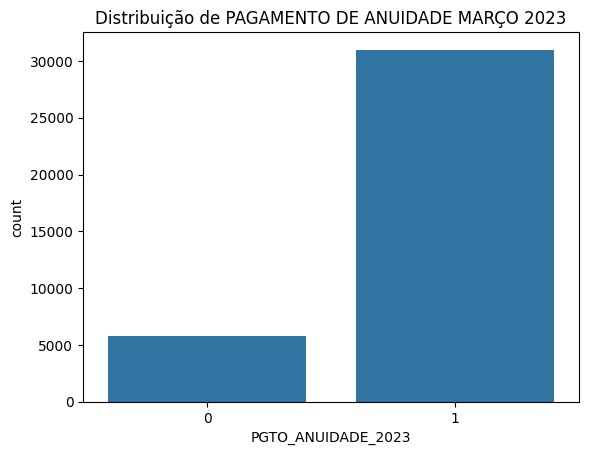

In [38]:
# Verificar o balanceamento da distribuição da variável alvo ('PAGAMENTO DE ANUIDADE MARÇO 2023')
print("\nDistribuição de PAGAMENTO DE ANUIDADE MARÇO 2023:")
print(df[var_interesse].value_counts(), df[var_interesse].value_counts(normalize=True))
sns.countplot(x=var_interesse, data=df)
plt.title('Distribuição de PAGAMENTO DE ANUIDADE MARÇO 2023')
plt.show()

In [39]:
results = {}
# Validação cruzada
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1') # Utilizando a métrica F1 pelo desbalanceamento observado acima
    results[name] = {
        'model': model,
        'mean_f1': scores.mean(),
        'std_1': scores.std()
    }

In [40]:
results

{'Logit': {'model': LogisticRegression(),
  'mean_f1': np.float64(0.9542669854155404),
  'std_1': np.float64(0.06767531373331444)},
 'NB': {'model': GaussianNB(),
  'mean_f1': np.float64(0.3258825126038719),
  'std_1': np.float64(0.3400187171335778)},
 'KNN': {'model': KNeighborsClassifier(),
  'mean_f1': np.float64(0.8905197287931028),
  'std_1': np.float64(0.07632028450731185)},
 'Tree': {'model': DecisionTreeClassifier(),
  'mean_f1': np.float64(0.936018603536569),
  'std_1': np.float64(0.07126968003010468)},
 'Forest': {'model': RandomForestClassifier(),
  'mean_f1': np.float64(0.7718841431332205),
  'std_1': np.float64(0.3768598186713701)}}

In [41]:
# Best Model
best_model_name = max(results, key=lambda name: results[name]['mean_f1'])
print(best_model_name)
best_model = results[best_model_name]['model']
best_model

Logit


LogisticRegression()

In [42]:
# Estimar o modelo para todos os dados
best_model.fit(X,y)

LogisticRegression()

In [43]:
r = {
    'metodo': best_model_name,
    'resultados': best_model,
    'escala': stats,
    'f1': best_model.score(X, y)
}

In [48]:
save_dir = "data"
filename = os.path.join(save_dir, 'modelo_final.pkl')

In [49]:
print(filename)

data\modelo_final.pkl


In [50]:
pickle.dump(r, open(filename, "wb"))

In [45]:
# gráfico para a matriz

y_predict = best_model.predict(X)
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y, y_predict),
    columns=[
        "Predição Inadimplente 2023",
        "Predição Pago 2023",
    ],
    index=["Inadimplente 2023 Verdadeiro", "Pago 2023 Verdadeiro"],
)


,Predição Inadimplente 2023,Predição Pago 2023
Inadimplente 2023 Verdadeiro,5054,737
Pago 2023 Verdadeiro,2,30991


Seleção e treino de modelo

In [ ]:
# Para ver todos coeficientes da célula abaixo, descomentar a linha seguinte: 
# pd.set_option('display.max_rows', None) 

# Para desfazer a linha anterior:
# pd.reset_option('display.max_rows') # Optional: Reset to default after printing

In [46]:
# Checking up for coefficients:
coefficients = best_model.coef_[0]
feature_names = X.columns 

# Create a DataFrame to display coefficients with feature names
coefficients_df = pd.DataFrame({'Variável': feature_names, 'Coeficiente': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coeficiente', ascending=False)
print("Coeficiente de Regressão Logística:")
print(coefficients_df)

Coeficiente de Regressão Logística:
                                   Variável  Coeficiente
0                        PGTO_ANUIDADE_2022    10.265276
5                      MATRICULA_Reinscrito     1.329956
59                         PROVINCIA_CANETE     1.196500
207              DISTRITO_ALTO SELVA ALEGRE     1.115396
984   PROGRAMA_CURSO_INGENIERÍA DE SOFTWARE     1.012435
...                                     ...          ...
104                      PROVINCIA_HUANCAYO    -1.161513
943          PROGRAMA_CURSO_ING. AUTOMOTRIZ    -1.239175
1003          BOLSAS_DESCONTO_SIN BENEFICIO    -1.265842
329                     DISTRITO_CHONGOYAPE    -1.445259
3                            CURSO_EM_RISCO    -3.013886

[1012 rows x 2 columns]


In [47]:
# Obter intercepto
intercept = best_model.intercept_[0]
print(f"\nIntercepto de de Regressão Logística: {intercept:.4f}")


Intercepto de de Regressão Logística: -5.8163
